1. How to make it available for marking? (eg is slack they say make TAs collaborators or make it public)
2. distnace matrix h as eucledian distances squared (good in code, check in proofs)

## 1. Import Packages

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import euclidean_distances
import scipy.linalg as la
import pandas as pd
import seaborn as sns

## 2. Read data

In [10]:
# Read data frame with no header.
df = pd.read_csv("zoo.data", header=None)

# Name columns (no header previously).
df.columns = ["animal name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator",
             "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type"]

# Show some rows.
print(df.shape)
df.head(20)

(101, 18)


animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0     aardvark     1         0     0     1         0        0         1   
1     antelope     1         0     0     1         0        0         0   
2         bass     0         0     1     0         0        1         1   
3         bear     1         0     0     1         0        0         1   
4         boar     1         0     0     1         0        0         1   
5      buffalo     1         0     0     1         0        0         0   
6         calf     1         0     0     1         0        0         0   
7         carp     0         0     1     0         0        1         0   
8      catfish     0         0     1     0         0        1         1   
9         cavy     1         0     0     1         0        0         0   
10     cheetah     1         0     0     1         0        0         1   
11     chicken     0         1     1     0         1        0         0   
12        chub     0         0     1     0         0        1         1   
13        clam     0         0     1     0         0        0         1   
14        crab     0         0     1     0         0        1         1   
15    crayfish     0         0     1     0         0        1         1   
16        crow     0         1     1     0         1        0         1   
17        deer     1         0     0     1         0        0         0   
18     dogfish     0         0     1     0         0        1         1   
19     dolphin     0         0     0     1         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0         1         1         1         0     0     4     0         0   
1         1         1         1         0     0     4     1         0   
2         1         1         0         0     1     0     1         0   
3         1         1         1         0     0     4     0         0   
4         1         1         1         0     0     4     1         0   
5         1         1         1         0     0     4     1         0   
6         1         1         1         0     0     4     1         1   
7         1         1         0         0     1     0     1         1   
8         1         1         0         0     1     0     1         0   
9         1         1         1         0     0     4     0         1   
10        1         1         1         0     0     4     1         0   
11        0         1         1         0     0     2     1         1   
12        1         1         0         0     1     0     1         0   
13        0         0         0         0     0     0     0         0   
14        0         0         0         0     0     4     0         0   
15        0         0         0         0     0     6     0         0   
16        0         1         1         0     0     2     1         0   
17        1         1         1         0     0     4     1         0   
18        1         1         0         0     1     0     1         0   
19        1         1         1         0     1     0     1         0   

    catsize  type  
0         1     1  
1         1     1  
2         0     4  
3         1     1  
4         1     1  
5         1     1  
6         1     1  
7         0     4  
8         0     4  
9         0     1  
10        1     1  
11        0     2  
12        0     4  
13        0     7  
14        0     7  
15        0     7  
16        0     2  
17        1     1  
18        1     4  
19        1     1

## 3. EDA

/home/mark/anaconda3/envs/ml_adv_ass_1_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='type', ylabel='count'>

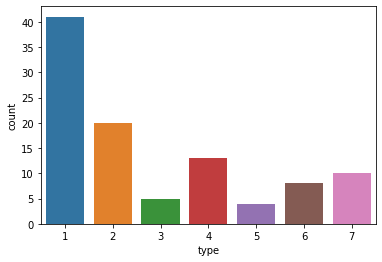

In [11]:
# Show observation frequencies in classes.
sns.countplot(df['type'],label="Count")

Text(0.5, 1.05, 'Correlation of Zoo Features')

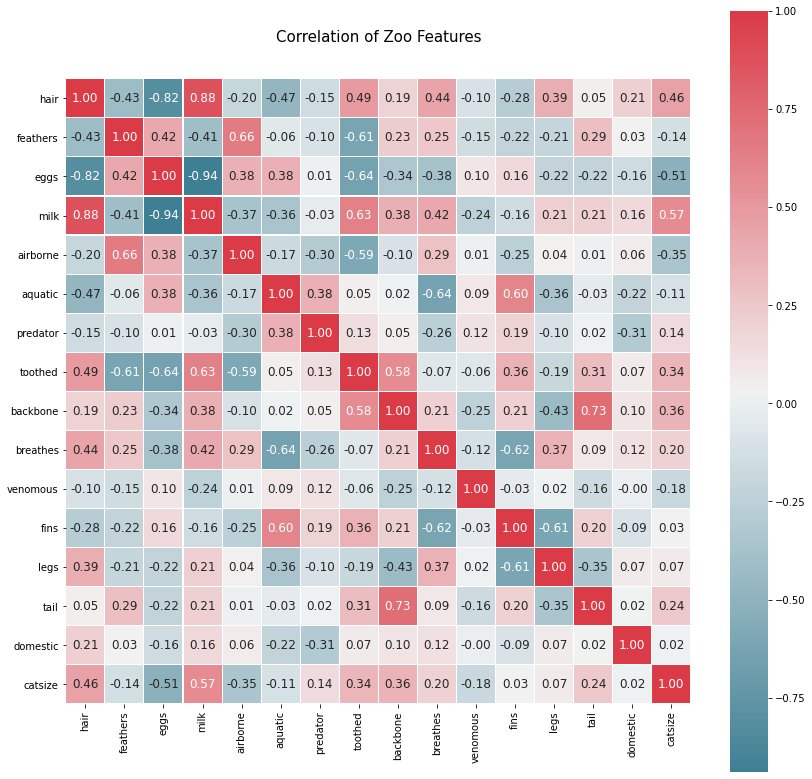

In [12]:
# Show correlations. E.g.: hair - milk is high = mammals have hair and milk
corr = df.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Zoo Features', y=1.05, size=15) 

## 4. Dimensionality Reduction

### 4.1 Principal Component Analysis (PCA)

In [49]:
# Extract data matrix of size (n_samples, n_features) (but no animal name and type, so 16 features).
X_not_centered = df.iloc[:,1:-1].to_numpy().astype(np.float64)
print(X_not_centered.shape)
print(X_not_centered)

(101, 16)
[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]


In [50]:
# Data centering (subtract mean of each columns/features from each entry in that column)
X = X_not_centered - X_not_centered.mean(axis=0).astype(np.float64)
print(X.shape)
print(X)

(101, 16)
[[ 0.57425743 -0.1980198  -0.58415842 ... -0.74257426 -0.12871287
   0.56435644]
 [ 0.57425743 -0.1980198  -0.58415842 ...  0.25742574 -0.12871287
   0.56435644]
 [-0.42574257 -0.1980198   0.41584158 ...  0.25742574 -0.12871287
  -0.43564356]
 ...
 [ 0.57425743 -0.1980198  -0.58415842 ...  0.25742574 -0.12871287
   0.56435644]
 [-0.42574257 -0.1980198   0.41584158 ... -0.74257426 -0.12871287
  -0.43564356]
 [-0.42574257  0.8019802   0.41584158 ...  0.25742574 -0.12871287
  -0.43564356]]


In [51]:
# Do PCA on centered data and embed data into 2 dimensions.
pca = PCA(n_components=2)
pipeline = make_pipeline(pca, scaler)
X_embedded = pipeline.fit_transform(X)

In [52]:
print(pca.explained_variance_ratio_)

[0.62561548 0.14496905]


In [53]:
df_2 = pd.DataFrame({'pc1': X_embedded[:, 0], 'pc2': X_embedded[:, 1], 
                     'animal name': df['animal name'], 'type': df['type']})
print(df_2.shape)
df_2.head(20)

(101, 4)


pc1       pc2 animal name  type
0   0.647865 -1.054485    aardvark     1
1   0.626576 -1.203724    antelope     1
2  -1.501737  0.251236        bass     4
3   0.647865 -1.054485        bear     1
4   0.612508 -1.221062        boar     1
5   0.626576 -1.203724     buffalo     1
6   0.633498 -1.252833        calf     1
7  -1.480747  0.219465        carp     4
8  -1.501737  0.251236     catfish     4
9   0.658703 -0.768095        cavy     1
10  0.612508 -1.221062     cheetah     1
11 -0.410292  0.956615     chicken     2
12 -1.501737  0.251236        chub     4
13 -1.309467  0.936459        clam     7
14  0.501897  1.388993        crab     7
15  1.430095  1.552482    crayfish     7
16 -0.431282  0.988386        crow     2
17  0.626576 -1.203724        deer     1
18 -1.491584 -0.066925     dogfish     4
19 -1.393539 -1.066377     dolphin     1

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

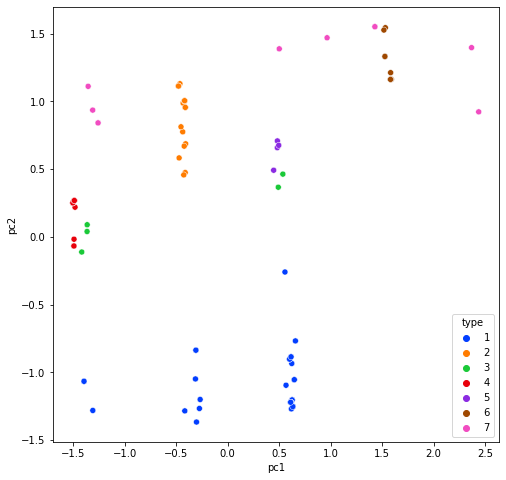

In [54]:
# Generate figure.
fig = plt.figure(figsize=(8,8))

sns.scatterplot(data=df_2, x="pc1", y="pc2", hue="type", palette="bright")

### 2.2 Multi-Dimensional Scaling (MDS)

In [273]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [274]:
# Extract data matrix of size (n_samples, n_features) (but no animal name and type, so 16 features).
X_not_centered = df.iloc[:,1:-1].to_numpy().astype(np.float64)
print(X_not_centered.shape)
print(X_not_centered)

(101, 16)
[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]


In [275]:
# Data centering (subtract mean of each columns/features from each entry in that column)
X = X_not_centered - X_not_centered.mean(axis=0).astype(np.float64)
print(X.shape)
print(X)

(101, 16)
[[ 0.57425743 -0.1980198  -0.58415842 ... -0.74257426 -0.12871287
   0.56435644]
 [ 0.57425743 -0.1980198  -0.58415842 ...  0.25742574 -0.12871287
   0.56435644]
 [-0.42574257 -0.1980198   0.41584158 ...  0.25742574 -0.12871287
  -0.43564356]
 ...
 [ 0.57425743 -0.1980198  -0.58415842 ...  0.25742574 -0.12871287
   0.56435644]
 [-0.42574257 -0.1980198   0.41584158 ... -0.74257426 -0.12871287
  -0.43564356]
 [-0.42574257  0.8019802   0.41584158 ...  0.25742574 -0.12871287
  -0.43564356]]


In [277]:
D = euclidean_distances(X)
D = np.power(D,2)
print(D.shape)
print(D)

(101, 101)
[[ 0.  2. 24. ...  1. 23. 13.]
 [ 2.  0. 24. ...  1. 23. 11.]
 [24. 24.  0. ... 23.  7. 11.]
 ...
 [ 1.  1. 23. ...  0. 24. 12.]
 [23. 23.  7. ... 24.  0.  8.]
 [13. 11. 11. ... 12.  8.  0.]]


In [278]:
check_symmetric(D)

True

In [282]:
# Broadcasting
S = -0.5 * (D - D.mean(axis=1).reshape(D.shape[0],1) - D.mean(axis=0).reshape(1,D.shape[0]) + D.mean())

In [285]:
print(S.shape)
print(np.array_str(S, precision=4, suppress_small=True))

(101, 101)
[[ 3.94    2.7519 -4.4857 ...  3.1974 -4.0303 -2.7135]
 [ 2.7519  3.5638 -4.6739 ...  3.0093 -4.2184 -1.9016]
 [-4.4857 -4.6739 11.0885 ... -4.2283  7.544   1.8608]
 ...
 [ 3.1974  3.0093 -4.2283 ...  3.4549 -4.7729 -2.456 ]
 [-4.0303 -4.2184  7.544  ... -4.7729 10.9994  3.3162]
 [-2.7135 -1.9016  1.8608 ... -2.456   3.3162  3.6331]]


In [286]:
S_cheat = np.matmul(X, X.transpose())
print(S_cheat.shape)
print(np.array_str(S_cheat, precision=4, suppress_small=True))

(101, 101)
[[ 3.94    2.7519 -4.4857 ...  3.1974 -4.0303 -2.7135]
 [ 2.7519  3.5638 -4.6739 ...  3.0093 -4.2184 -1.9016]
 [-4.4857 -4.6739 11.0885 ... -4.2283  7.544   1.8608]
 ...
 [ 3.1974  3.0093 -4.2283 ...  3.4549 -4.7729 -2.456 ]
 [-4.0303 -4.2184  7.544  ... -4.7729 10.9994  3.3162]
 [-2.7135 -1.9016  1.8608 ... -2.456   3.3162  3.6331]]


In [287]:
# Eigendecomposition of S
L, U = la.eig(S)

In [289]:
S_check = np.real(np.dot(U,np.dot(np.diag(Lambdas_vec_real), la.inv(U))))
print(S_cheat.shape)
print(np.array_str(S_cheat, precision=4, suppress_small=True))

(101, 101)
[[ 3.94    2.7519 -4.4857 ...  3.1974 -4.0303 -2.7135]
 [ 2.7519  3.5638 -4.6739 ...  3.0093 -4.2184 -1.9016]
 [-4.4857 -4.6739 11.0885 ... -4.2283  7.544   1.8608]
 ...
 [ 3.1974  3.0093 -4.2283 ...  3.4549 -4.7729 -2.456 ]
 [-4.0303 -4.2184  7.544  ... -4.7729 10.9994  3.3162]
 [-2.7135 -1.9016  1.8608 ... -2.456   3.3162  3.6331]]


In [304]:
L.real

array([ 4.39219233e+02,  1.01776886e+02,  5.09215546e+01,  2.74402440e+01,
        1.77320050e+01,  1.49336543e+01,  1.04694476e+01,  7.46174308e+00,
        5.73414729e+00,  9.60957755e+00,  6.73287684e+00,  3.78397043e+00,
        3.00926055e+00,  2.10302665e+00,  7.73640059e-01,  3.58139143e-01,
        4.64339916e-14, -3.56347460e-14,  2.10865239e-14,  2.10865239e-14,
       -1.87157687e-14, -1.87157687e-14,  1.78989397e-14, -1.39559855e-14,
       -1.39559855e-14,  1.36931530e-14,  1.36931530e-14, -1.17517911e-14,
       -1.17517911e-14,  1.15753800e-14,  9.53180225e-15,  9.53180225e-15,
        9.22409798e-15,  9.22409798e-15, -8.74275460e-15, -7.09174261e-15,
       -7.09174261e-15, -5.77333829e-15, -4.37811810e-15, -4.37811810e-15,
       -4.18016898e-15,  4.89020280e-15,  4.89020280e-15,  4.98241063e-15,
       -2.40141669e-15, -2.40141669e-15, -3.13140384e-15, -3.13140384e-15,
       -3.07412177e-15,  2.79422813e-16,  2.79422813e-16,  2.05117343e-15,
        2.05117343e-15,  

In [290]:
d = 2
X_embedded_mds_all = np.real(np.dot(np.sqrt(np.diag(L)), la.inv(U)))
X_embedded_mds = X_embedded_mds_all[:, :d]

In [310]:
d = 2
I = np.identity(X_embedded_mds.shape[0])[:d, :]
X_embedded_mds_2 = np.dot(I, np.dot(np.sqrt(L), np.transpose(U)))

In [311]:
print(np.array_str(X_embedded_mds, precision=4, suppress_small=True))

[[-1.351  -1.3066]
 [-1.0585 -1.2083]
 [ 0.3141 -0.2894]
 [-0.0474  0.118 ]
 [-0.7221  0.2185]
 [ 0.0726  0.2853]
 [ 0.1931 -0.1891]
 [-0.2626  0.0759]
 [-0.3064  0.1035]
 [ 0.0026  0.3155]
 [-0.0326 -0.0854]
 [-0.162  -0.0787]
 [-0.2857 -0.0564]
 [-0.2278  0.0065]
 [-0.0575  0.0037]
 [ 0.0482 -0.032 ]
 [-0.     -0.    ]
 [-0.     -0.    ]
 [ 0.     -0.    ]
 [ 0.     -0.    ]
 [-0.     -0.    ]
 [-0.     -0.    ]
 [-0.      0.    ]
 [-0.     -0.    ]
 [-0.     -0.    ]
 [ 0.     -0.    ]
 [ 0.     -0.    ]
 [-0.     -0.    ]
 [-0.     -0.    ]
 [-0.      0.    ]
 [-0.      0.    ]
 [-0.      0.    ]
 [ 0.     -0.    ]
 [ 0.     -0.    ]
 [ 0.      0.    ]
 [ 0.      0.    ]
 [ 0.      0.    ]
 [-0.      0.    ]
 [ 0.     -0.    ]
 [ 0.     -0.    ]
 [-0.     -0.    ]
 [-0.      0.    ]
 [-0.      0.    ]
 [-0.     -0.    ]
 [ 0.     -0.    ]
 [ 0.     -0.    ]
 [ 0.      0.    ]
 [ 0.      0.    ]
 [-0.     -0.    ]
 [-0.      0.    ]
 [-0.      0.    ]
 [-0.      0.    ]
 [-0.      0

In [312]:
print(np.array_str(X_embedded_mds_2, precision=4, suppress_small=True))

[-3.8831+0.j -2.1191+0.j]


In [296]:
df_mds = pd.DataFrame({'dim1': X_embedded_mds[:, 0], 'dim2': X_embedded_mds[:, 1], 
                       'animal name': df['animal name'], 'type': df['type']})
print(df_mds.shape)
df_mds.head(90)

(101, 4)


dim1          dim2 animal name  type
0  -1.351029e+00 -1.306634e+00    aardvark     1
1  -1.058533e+00 -1.208344e+00    antelope     1
2   3.141026e-01 -2.894052e-01        bass     4
3  -4.744328e-02  1.180238e-01        bear     1
4  -7.221339e-01  2.185090e-01        boar     1
..           ...           ...         ...   ...
85  1.866968e-30  7.096665e-31    starfish     7
86  5.099932e-30 -4.256710e-31    stingray     4
87  6.043301e-30  4.350100e-31        swan     2
88 -4.259584e-30  4.174340e-31     termite     6
89 -3.446450e-31 -5.160569e-32        toad     5

[90 rows x 4 columns]

In [267]:
print(df_mds.min())
print(df_mds.max())
print(df_mds.mean())

df_mds

dim1           -1.35103
dim2           -1.30663
animal name    aardvark
type                  1
dtype: object
dim1           0.314103
dim2           0.315514
animal name        wren
type                  7
dtype: object
dim1   -0.038447
dim2   -0.020981
type    2.831683
dtype: float64


dim1          dim2 animal name  type
0   -1.351029e+00 -1.306634e+00    aardvark     1
1   -1.058533e+00 -1.208344e+00    antelope     1
2    3.141026e-01 -2.894052e-01        bass     4
3   -4.744328e-02  1.180238e-01        bear     1
4   -7.221339e-01  2.185090e-01        boar     1
..            ...           ...         ...   ...
96   2.259282e-30 -6.133721e-32     wallaby     1
97  -6.495760e-30 -2.204226e-30        wasp     6
98   4.047635e-30  1.535312e-30        wolf     1
99   2.532392e-31  1.491795e-31        worm     7
100 -3.657885e-31 -2.551976e-32        wren     2

[101 rows x 4 columns]

In [268]:
df_mds.drop(0, axis=0, inplace=True)

In [270]:
df_mds.drop(1, axis=0, inplace=True)

In [271]:
df_mds

dim1          dim2 animal name  type
2    3.141026e-01 -2.894052e-01        bass     4
3   -4.744328e-02  1.180238e-01        bear     1
4   -7.221339e-01  2.185090e-01        boar     1
5    7.256844e-02  2.853445e-01     buffalo     1
6    1.930976e-01 -1.890769e-01        calf     1
..            ...           ...         ...   ...
96   2.259282e-30 -6.133721e-32     wallaby     1
97  -6.495760e-30 -2.204226e-30        wasp     6
98   4.047635e-30  1.535312e-30        wolf     1
99   2.532392e-31  1.491795e-31        worm     7
100 -3.657885e-31 -2.551976e-32        wren     2

[99 rows x 4 columns]

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

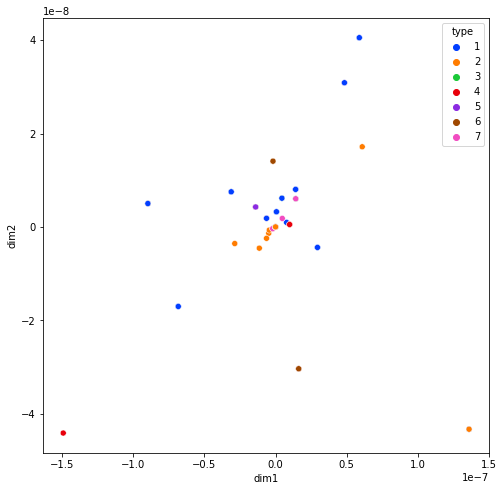

In [302]:
# Generate figure.
fig = plt.figure(figsize=(8,8))

sns.scatterplot(data=df_mds[30:], x="dim1", y="dim2", hue="type", palette="bright")